In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la

from matplotlib import pyplot as plt
#%matplotlib notebook
%matplotlib inline

In [2]:
# Cargamos un archivo que contiene un trayectoria.
datTray = np.load ("automovilTrajectory.npz")

# Extraemos la información importante.
Crv = datTray['Crv'] # Curva y sus derivadas en coordenadas espaciales.
    
_, N = Crv.shape #Obtenemos el número de muestras con el que contamos.

Crv.shape =  (2, 7001)


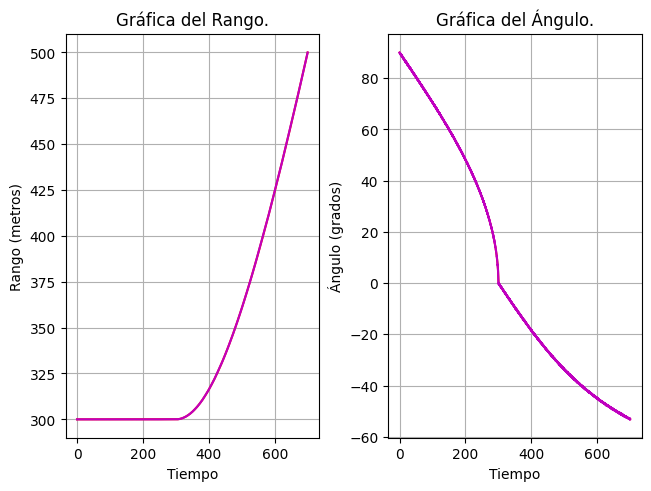

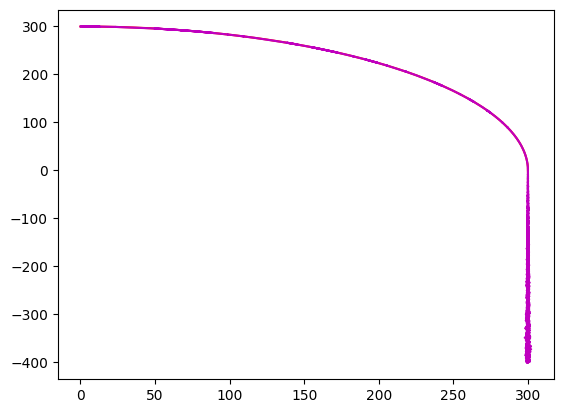

In [3]:
# Cargamos un archivo que contiene un trayectoria.
# datTray = np.load("curveMG2.npz")

# Extraemos la información importante.
Crv = datTray['Crv']  # Curva y sys derivadas en coordenadas espaciales.
# iCrv = datTray['iCrv']  # Curva proyectada y sus coordenadas espaciales en la imagen.
# Z = datTray['Z']  # Distancia entre la cámara y la superficie donde se mueve el obj.

# Crv = p
# _, N = Crv.shape  #Obtenemos el número de muestras con el que contamos.

# El intervalo de tiempo entre muestras.
dt = 0.1

#Le añadimos ruido a las mediciones de la trayectoria y generamos los datos de medición.
#definimos en ruido de medicion.
varRnge = 0.005**2
varTheta = 0.0017**2

N -= 1

t = np.linspace(0, dt * N, N)

factNR = 1.

# Definimos el ruido de medición que vamos a añadir a los datos.
noiseRnge = rnd.normal(0, np.sqrt(varRnge), (1, N))
noiseTheta = rnd.normal(0, np.sqrt(varTheta), (1, N))


print("Crv.shape = ", Crv.shape)


#Crv[0, :] -= np.mean(Crv[0, :])
#Crv[1, :] -= np.mean(Crv[1, :])
#Crv[0, :] *= 10
#Crv[1, :] *= 10



# Definimos el valor real de la trayectora del objeto, y su derivada.
rnge = np.sqrt(Crv[0, :] ** 2 + Crv[1, :] ** 2)
theta = np.arctan2(Crv[1, :], Crv[0, :])
z = np.vstack([rnge[:N], theta[:N], np.diff(rnge) / dt, np.diff(theta) / dt])

# Definimos la señal con la que vamos a trabajar: redondeando z y añadiendole error.
zn = z[:2,:] + factNR * np.vstack([noiseRnge, noiseTheta])
# z.shape

figA, (axA0, axA1) = plt.subplots(1, 2, layout='constrained')
axA0.plot(t, z[0, :], 'r', t, zn[0, :], 'm')
axA0.set(xlabel='Tiempo', ylabel='Rango (metros)',
            title='Gráfica del Rango.')
axA0.grid()

axA1.plot(t, z[1, :] * 180 / np.pi, 'r', t, zn[1, :]*180/np.pi, 'm')
axA1.set(xlabel='Tiempo', ylabel='Ángulo (grados)',
            title='Gráfica del Ángulo.')
axA1.grid()

figC, axC = plt.subplots()
axC.plot(z[0,:]*np.cos(z[1,:]), z[0,:]*np.sin(z[1,:]),'r', zn[0,:]*np.cos(zn[1,:]), zn[0,:]*np.sin(zn[1,:]), 'm')

# "Matriz" de transicion de estado.

$$\begin{aligned}
\mathbf{x_k} & =  x_{k-1} + \dot{x}_{k-1} \Delta t^2 + \frac{1}{2}\ddot{x}{\Delta t}^2 
\end{aligned}$$
$$\begin{aligned}
\mathbf{y_k} & =  y_{k-1} + \dot{y}_{k-1} \Delta t^2 + \frac{1}{2}\ddot{y}{\Delta t}^2 
\end{aligned}$$

$$
\begin{aligned}
\mathbf{A} & =  \left[\begin{array}{cccccc}
1 &\Delta t & 0.5\Delta t^2 & 0  & 0 & 0\\
0 & 1 & \Delta t & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & \Delta t & 0.5\Delta t^2\\
0 & 0 & 0 & 0 & 1 &\Delta t\\
0 & 0 & 0 & 0 & 0 & 1\\
\end{array}\right]
\end{aligned}
$$

In [4]:
_A = np.eye(6)  # "Matriz" de transicion de estado.
_A[0, 1] = dt
_A[1, 2] = dt
_A[3, 4] = dt
_A[4, 5] = dt

_A[0, 2] = 0.5 * dt ** 2
_A[3, 5] = 0.5 * dt ** 2

print("_A = \n", _A)

_A = 
 [[1.    0.1   0.005 0.    0.    0.   ]
 [0.    1.    0.1   0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.1   0.005]
 [0.    0.    0.    0.    1.    0.1  ]
 [0.    0.    0.    0.    0.    1.   ]]


# "Matriz" de incertidumbre del estado.

In [5]:
# px,   pxx',   px'x,   0,     0,       0
# px'x, px',    px'x'', 0,     0,       0
# px''x,px''x', px'',   0,     0,       0
# 0,    0,      0,      py,    pyy',   pyy''
# 0,    0,      0,      py'y,  py',    py'y''
# 0,    0       0,      py''y, py''y', py''

# px    is the variance of the X coordinate position estimation
px = 10.0
# px'   is the variance of the X coordinate velocity estimation
px_dot = 1
# px''  is the variance of the X coordinate acceleration estimation
px_ddot = 0.1
# py    is the variance of the Y coordinate position estimation
py = 10.0
# py'   is the variance of the Y coordinate velocity estimation
py_dot = 1
# py''  is the variance of the Y coordinate acceleration estimation
py_ddot = 0.1

# Pxx'  is the multiplication of the standard deviations of Px and Px', that is sqrt(Px)*sqrt(Px')
# Px'x  is the multiplication of the standard deviations of Px' and Px, that is sqrt(Px')*sqrt(Px)
# Px'x'' is the multiplication of the standard deviations of Px' and Px'', that is sqrt(Px')*sqrt(Px'')
# and so on.

# desviaciones estándar
std_px = np.sqrt(px)
std_px_dot = np.sqrt(px_dot)
std_px_ddot = np.sqrt(px_ddot)
std_py = np.sqrt(py)
std_py_dot = np.sqrt(py_dot)
std_py_ddot = np.sqrt(py_ddot)

_P = np.zeros((6, 6))
_P[0, 0] = px
_P[1, 1] = px_dot
_P[2, 2] = px_ddot
_P[3, 3] = py
_P[4, 4] = py_dot
_P[5, 5] = py_ddot

_P[0, 1] = _P[1, 0] = std_px * std_px_dot  # Pxx'
_P[1, 0] = _P[0, 1]  # Px'x
_P[1, 2] = _P[2, 1] = std_px_dot * std_px_ddot  # Px'x''
_P[2, 1] = _P[1, 2]  # Px''x'
_P[0, 2] = _P[2, 0] = 0  # Px, Px''
_P[3, 4] = _P[4, 3] = std_py * std_py_dot  # Py, Py'
_P[4, 3] = _P[3, 4]  # Py'x
_P[4, 5] = _P[5, 4] = std_py_dot * std_py_ddot  # Py', Py''
_P[5, 4] = _P[4, 5]

print("_P = \n", _P)

_P = 
 [[10.          3.16227766  0.          0.          0.          0.        ]
 [ 3.16227766  1.          0.31622777  0.          0.          0.        ]
 [ 0.          0.31622777  0.1         0.          0.          0.        ]
 [ 0.          0.          0.         10.          3.16227766  0.        ]
 [ 0.          0.          0.          3.16227766  1.          0.31622777]
 [ 0.          0.          0.          0.          0.31622777  0.1       ]]


 # "Matriz" de incertidumbre de la predicción.

In [6]:
# σ²x      σ²xx'     σ²xx''    0         0         0
# σ²x'x    σ²x'      σ²x'x''   0         0         0
# σ²x''x   σ²x''x'   σ²x''     0         0         0
# 0        0         0         σ²y       σ²yy'     σ²yy''
# 0        0         0         σ²y'y     σ²y'      σ²y'y''
# 0        0         0         σ²y''y    σ²y''y'   σ²y''
_Q = np.zeros((6, 6))
_Q[0, 0] = _Q[3, 3] = (dt ** 4) / 4
_Q[0, 1] = _Q[1, 0] = (dt ** 3) / 2
_Q[3, 4] = _Q[4, 3] = (dt ** 3) / 2
_Q[0, 2] = _Q[2, 0] = (dt ** 2) / 2
_Q[3, 5] = _Q[3, 3] = (dt ** 2) / 2
_Q[1, 1] = _Q[4, 4] = (dt ** 2)
_Q[1, 2] = _Q[2, 1] = dt
_Q[4, 5] = _Q[5, 4] = dt
_Q[2, 2] = _Q[5, 5] = 1

# _Q = _Q * σ2(random variance in acceleration)
_Q = _Q * 1e-9

print("_Q = \n", _Q)

_Q = 
 [[2.5e-14 5.0e-13 5.0e-12 0.0e+00 0.0e+00 0.0e+00]
 [5.0e-13 1.0e-11 1.0e-10 0.0e+00 0.0e+00 0.0e+00]
 [5.0e-12 1.0e-10 1.0e-09 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 5.0e-12 5.0e-13 5.0e-12]
 [0.0e+00 0.0e+00 0.0e+00 5.0e-13 1.0e-11 1.0e-10]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e-10 1.0e-09]]


## Matriz Jacobiana


 \begin{bmatrix}
\frac{x}{\sqrt{x^2 + y^2}} & 0 & 0 & \frac{y}{\sqrt{x^2 + y^2}} & 0 & 0 \\
-\frac{y}{x^2 + y^2} & 0 & 0 & \frac{x}{x^2 + y^2} & 0 & 0
\end{bmatrix}


In [7]:
def jacobian_h(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    H = np.array([
        [x / r, 0, 0, y / r, 0, 0],
        [-y / (x ** 2 + y ** 2), 0, 0, x / (x ** 2 + y ** 2), 0, 0]
    ])
    return H


print(jacobian_h(1, 1))

[[ 0.70710678  0.          0.          0.70710678  0.          0.        ]
 [-0.5         0.          0.          0.5         0.          0.        ]]


## Matriz de Covarianza de la Medición 

\begin{bmatrix}
\sigma^2_{r,m} & 0 \\
0 & \sigma^2_{\phi,m}
\end{bmatrix}


In [8]:
def measurement_covariance(sigma_r, sigma_phi):
    R = np.array([
        [sigma_r ** 2, 0],
        [0, sigma_phi ** 2]
    ])
    return R


print(measurement_covariance(1, 1))

[[1 0]
 [0 1]]


In [9]:
# sigma_Rnge = varRnge  # desviación estándar en la medición de rango
# sigma_Theta_m = varTheta  # desviación estándar en la medición de ángulo
# # Matriz de incertidumbre de medición R
# _R = np.array([
#     [sigma_Rnge ** 2, 0],
#     [0, sigma_Theta_m ** 2]
# ])
_R = np.array([[varRnge, 0], [0, varTheta]])
print("R = \n", _R)
# _R = np.eye(2) * 0.1

R = 
 [[2.50e-05 0.00e+00]
 [0.00e+00 2.89e-06]]


In [10]:
# Definir nuestro sistema.

A = _A  #"Matriz" de transicion de estado.
# B = _B  #"Matriz" de control.
# H = _H  #"Matriz" de medición.
P = _P  #"Matriz" de incertidumbre del estado.
Q = _Q  #"Matriz" de incertidumbre de la predicción.
R = _R  #Matriz de incertidumbre de medición.


In [11]:
def ExtendedKalmanFilter (Xhat_k0, Phat_k0, U_k1, Z_k, A, B, DH, H, Q, R):
    #Predicción
    Xbar_k1 = np.dot(A, Xhat_k0) + np.dot(B, U_k1)
    Pbar_k1 = np.dot(A, np.dot(Phat_k0, A.transpose()))+Q
    
    #Actualización

    #Calculamos la ganancia.
    denom = np.dot(np.dot(DH, Pbar_k1), DH.transpose())+R
    if len(denom) > 1:
        denom = la.inv(denom)
    else:
        denom = 1. / denom
    Kgain = np.dot(np.dot(Pbar_k1, DH.transpose()),denom)

    # Actualizamos el Estado y su incertidumbre.
    Xhat_k1 = Xbar_k1 + np.dot(Kgain, (Z_k- H))

    PhatLeft = np.eye(len(Xhat_k0))-np.dot(Kgain,DH)
    Phat_k1 = np.dot(np.dot(PhatLeft, Pbar_k1), PhatLeft.transpose())
    Phat_k1 = Phat_k1 + np.dot(np.dot(Kgain, R), Kgain.transpose())
    
    return Xhat_k1, Phat_k1, Xbar_k1


In [12]:
# 1. Inicializar el estado y la matriz de incertidumbre
# x = np.zeros((6, N))  # Estado: [x, vx, ax, y, vy, ay]
# x[:, 0] = np.array([0, 0, 0, 0, 0, 0])  # Inicializar en el origen

x = np.array([-1.3, 0, 0, -4.8, 0, 0])
P = 500 * np.eye(6)

# Inicializar las listas para almacenar las estimaciones
Xbar=np.zeros((N, 6))
Xhat=np.zeros((N, 6))
Phat=np.zeros((N, 6, 6))

#Inicializamos valor 0 de la estimacion del estado y su incertidumbre (Mat. Cov)
Xhat[0,:], Phat[0,:,:] = x, P

# 2. Ejecutar el filtro de Kalman
for idx in range(1,N):
    Z = zn[:, idx] #Obtenemos una medicion.
    x = Xhat[idx-1][0]
    y = Xhat[idx-1][3]
    H = np.array([[x/(np.sqrt(x**2 + y**2)), 0, 0, y/(np.sqrt(x**2 + y**2)), 0, 0],\
                   [-y/(x**2 + y**2), 0, 0, x/(x**2 + y**2), 0, 0]])
    h = np.array([np.sqrt(x**2 + y**2), np.arctan2(y, x)])
    
    Xhat[idx,:], Phat[idx,:,:], Xbar[idx,:] = ExtendedKalmanFilter (Xhat[idx-1], Phat[idx-1], 0, Z, A, 0, H, h, Q, R)


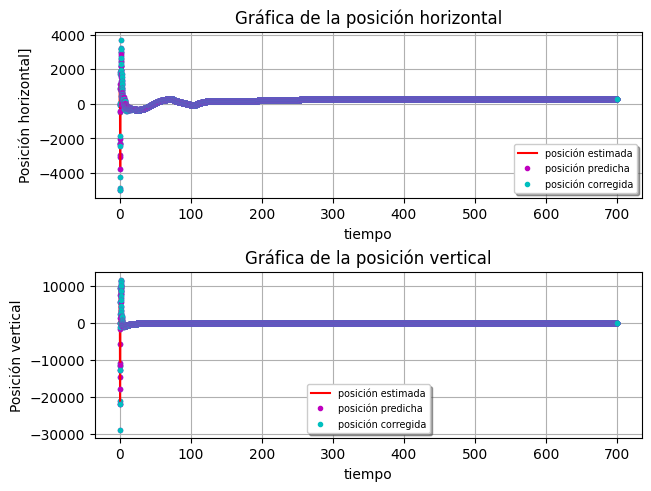

In [13]:
# 3. Visualizar los resultados
#Graficamos la Posicion.
fig2, (ax21, ax22) = plt.subplots(2, 1, layout='constrained')
i=1

ax21.plot((t[i-1],t[i]),(Xhat[i-1,0],Xhat[i,0]),'r', label='posición estimada')
ax21.plot((t[i-1],t[i]),(Xhat[i-1,0],Xbar[i,0]),'m.', label='posición predicha')
ax21.plot((t[i],t[i]),(Xbar[i,0],Xhat[i,0]),'c.', label='posición corregida')
ax22.plot((t[i-1],t[i]),(Xhat[i-1,1],Xhat[i,1]),'r', label='posición estimada')
ax22.plot((t[i-1],t[i]),(Xhat[i-1,1],Xbar[i,1]),'m.', label='posición predicha')
ax22.plot((t[i],t[i]),(Xbar[i,1],Xhat[i,1]),'c.', label='posición corregida')
for i in range(2,N):
    ax21.plot((t[i-1],t[i]),(Xhat[i-1,0],Xhat[i,0]),'r')
    ax21.plot((t[i-1],t[i]),(Xhat[i-1,0],Xbar[i,0]),'m.')
    ax21.plot((t[i],t[i]),(Xbar[i,0],Xhat[i,0]),'c.')
    ax22.plot((t[i-1],t[i]),(Xhat[i-1,1],Xhat[i,1]),'r')
    ax22.plot((t[i-1],t[i]),(Xhat[i-1,1],Xbar[i,1]),'m.')
    ax22.plot((t[i],t[i]),(Xbar[i,1],Xhat[i,1]),'c.')

ax21.set(xlabel='tiempo', ylabel='Posición horizontal]',
       title='Gráfica de la posición horizontal')
ax21.grid()
ax22.set(xlabel='tiempo', ylabel='Posición vertical',
       title='Gráfica de la posición vertical')
ax22.grid()

legend21 = ax21.legend(loc='lower right', shadow=True, fontsize='x-small')
legend21 = ax22.legend(loc='lower center', shadow=True, fontsize='x-small')


# Algoritmo Unscented Kalman Filter (UKF)

In [14]:
 # Algoritmo Unscented Kalman Filter (UKF)
#
# 1. Algorithm Unscented_Kalman_Filter(μₜ₋₁, Σₜ₋₁, uₜ, zₜ):
#
# 2. Generación de puntos sigma:
#    Xₜ₋₁ = [ μₜ₋₁, μₜ₋₁ + γ√Σₜ₋₁, μₜ₋₁ - γ√Σₜ₋₁ ]
#
# 3. Propagación de los puntos sigma:
#    Xₜ*̅ = g(uₜ, Xₜ₋₁)
#
# 4. Cálculo del estado predicho:
#    μₜ*̅ = Σᵢ₌₀²ⁿ wₘ[i] * Xₜ*̅[i]
#
# 5. Cálculo de la covarianza predicha:
#    Σₜ*̅ = Σᵢ₌₀²ⁿ wᶜ[i] * (Xₜ*̅[i] - μₜ*̅) * (Xₜ*̅[i] - μₜ*̅)ᵀ + Rₜ
#
# 6. Generación de puntos sigma para la covarianza predicha:
#    Xₜ = [ μₜ*̅, μₜ*̅ + γ√Σₜ*̅, μₜ*̅ - γ√Σₜ*̅ ]
#
# 7. Propagación de los puntos sigma a través del modelo de medición:
#    Zₜ*̅ = h(Xₜ)
#
# 8. Cálculo de la predicción de la medición:
#    ẑₜ = Σᵢ₌₀²ⁿ wₘ[i] * Zₜ*̅[i]
#
# 9. Cálculo de la covarianza de la medición:
#    Sₜ = Σᵢ₌₀²ⁿ wᶜ[i] * (Zₜ*̅[i] - ẑₜ) * (Zₜ*̅[i] - ẑₜ)ᵀ + Qₜ
#
# 10. Cálculo de la covarianza cruzada entre el estado y la medición:
#     Σₓ,ₓₜ = Σᵢ₌₀²ⁿ wᶜ[i] * (Xₜ*̅[i] - μₜ*̅) * (Zₜ*̅[i] - ẑₜ)ᵀ
#
# 11. Cálculo del ganancia de Kalman:
#     Kₜ = Σₓ,ₓₜ * Sₜ⁻¹
#
# 12. Actualización del estado estimado:
#     μₜ = μₜ*̅ + Kₜ * (zₜ - ẑₜ)
#
# 13. Actualización de la covarianza estimada:
#     Σₜ = Σₜ*̅ - Kₜ * Sₜ * Kₜᵀ
#
# 14. Retornar el estado y la covarianza actualizados:
#     return μₜ, Σₜ


In [15]:
# Paso 1: Algoritmo Unscented_Kalman_Filter(μₜ₋₁, Σₜ₋₁, uₜ, zₜ):
def unscented_kalman_filter(mu_prev, Sigma_prev, u, z, func_g, h, R, Q, alpha=1, beta=2, k=0):
    n = len(mu_prev)
    lambda_ = alpha ** 2 * (n + k) - n

    # Paso 2: Generación de puntos sigma
    # Xₜ₋₁ = [ μₜ₋₁, μₜ₋₁ + γ√Σₜ₋₁, μₜ₋₁ - γ√Σₜ₋₁ ]
    gamma = np.sqrt(n + lambda_)
    sqrt_Sigma = np.linalg.cholesky((n + lambda_) * Sigma_prev).T
    X_prev = np.vstack([mu_prev, mu_prev + gamma * sqrt_Sigma, mu_prev - gamma * sqrt_Sigma])

    # Paso 3: Propagación de los puntos sigma
    # Xₜ*̅ = g(uₜ, Xₜ₋₁)
    X_pred = np.array([func_g(X) for X in X_prev])  # Aplicar la función no lineal g

    # Paso 4: Cálculo del estado predicho
    # μₜ*̅ = Σᵢ₌₀²ⁿ wₘ[i] * Xₜ*̅[i]
    w_m = np.full(2 * n + 1, 1 / (2 * (n + lambda_)))
    w_m[0] = lambda_ / (n + lambda_)
    mu_pred = np.dot(w_m, X_pred)  # Media predicha

    # Paso 5: Cálculo de la covarianza predicha
    # Σₜ*̅ = Σᵢ₌₀²ⁿ wᶜ[i] * (Xₜ*̅[i] - μₜ*̅) * (Xₜ*̅[i] - μₜ*̅)ᵀ + Rₜ
    w_c = w_m.copy()
    w_c[0] += (1 - alpha**2 + beta)
    Sigma_pred = np.zeros((n, n))
    for i in range(2 * n + 1):
        diff = X_pred[i] - mu_pred
        Sigma_pred += w_c[i] * np.outer(diff, diff)
    Sigma_pred += R  # Agregar el ruido del proceso

    # Paso 6: Generación de puntos sigma para la covarianza predicha
    # Xₜ = [ μₜ*̅, μₜ*̅ + γ√Σₜ*̅, μₜ*̅ - γ√Σₜ*̅ ]
    sqrt_Sigma_pred = np.linalg.cholesky((n + lambda_) * Sigma_pred).T
    X_pred_sigma = np.vstack([mu_pred, mu_pred + gamma * sqrt_Sigma_pred, mu_pred - gamma * sqrt_Sigma_pred])

    # Paso 7: Propagación de los puntos sigma a través del modelo de medición
    # Zₜ*̅ = h(Xₜ)
    Z_pred = np.array([h(X) for X in X_pred_sigma])  # Aplicar la función de medición no lineal h

    # Paso 8: Cálculo de la predicción de la medición
    # ẑₜ = Σᵢ₌₀²ⁿ wₘ[i] * Zₜ*̅[i]
    z_pred = np.dot(w_m, Z_pred)

    # Paso 9: Cálculo de la covarianza de la medición
    # Sₜ = Σᵢ₌₀²ⁿ wᶜ[i] * (Zₜ*̅[i] - ẑₜ) * (Zₜ*̅[i] - ẑₜ)ᵀ + Qt
    Sigma_z = np.zeros((len(z), len(z)))
    for i in range(2 * n + 1):
        diff_z = Z_pred[i] - z_pred
        Sigma_z += w_c[i] * np.outer(diff_z, diff_z)
    Sigma_z += Q  # Agregar el ruido de medición

    # Paso 10: Cálculo de la covarianza cruzada entre el estado y la medición
    # Σₓ,ₓₜ = Σᵢ₌₀²ⁿ wᶜ[i] * (Xₜ*̅[i] - μₜ*̅) * (Zₜ*̅[i] - ẑₜ)ᵀ
    Sigma_xz = np.zeros((n, len(z)))
    for i in range(2 * n + 1):
        diff_x = X_pred[i] - mu_pred
        diff_z = Z_pred[i] - z_pred
        Sigma_xz += w_c[i] * np.outer(diff_x, diff_z)

    # Paso 11: Cálculo del ganancia de Kalman
    # Kₜ = Σₓ,ₓₜ * Sₜ⁻¹
    K = np.dot(Sigma_xz, np.linalg.inv(Sigma_z))

    # Paso 12: Actualización del estado estimado
    # μₜ = μₜ*̅ + Kₜ * (zₜ - ẑₜ)
    mu_updated = mu_pred + np.dot(K, (z - z_pred))

    # Paso 13: Actualización de la covarianza estimada
    # Σₜ = Σₜ*̅ - Kₜ * Sₜ * Kₜᵀ
    Sigma_updated = Sigma_pred - np.dot(np.dot(K, Sigma_z), K.T)

    # Paso 14: Retornar el estado y la covarianza actualizados
    return mu_updated, Sigma_updated

In [16]:

# Ejemplo de uso:
# Definir la función de propagación no lineal g y la de medición h

def func_g(x):
    # Ejemplo de función no lineal para el estado (g)
    return np.array([x[0] + 1, x[1] + 2])

def h(x):
    # Ejemplo de función de medición no lineal (h)
    return np.array([x[0]**2 + x[1]])

# Parámetros
mu_prev = np.array([0, 0])  # Estimación inicial del estado
Sigma_prev = np.eye(2)      # Covarianza inicial
u = np.array([1, 1])        # Entrada de control
z = np.array([5])           # Medición

# Ruido del proceso y de medición
R = np.eye(2) * 0.1
Q = np.eye(1) * 0.1

# Llamada al filtro UKF
mu_updated, Sigma_updated = unscented_kalman_filter(mu_prev, Sigma_prev, u, z, func_g, h, R, Q)

print("Estado actualizado:", mu_updated)
print("Covarianza actualizada:", Sigma_updated)


Estado actualizado: [0.82771668 1.91385834]
Covarianza actualizada: [[ 1.64606863 -0.22696568]
 [-0.22696568  1.98651716]]


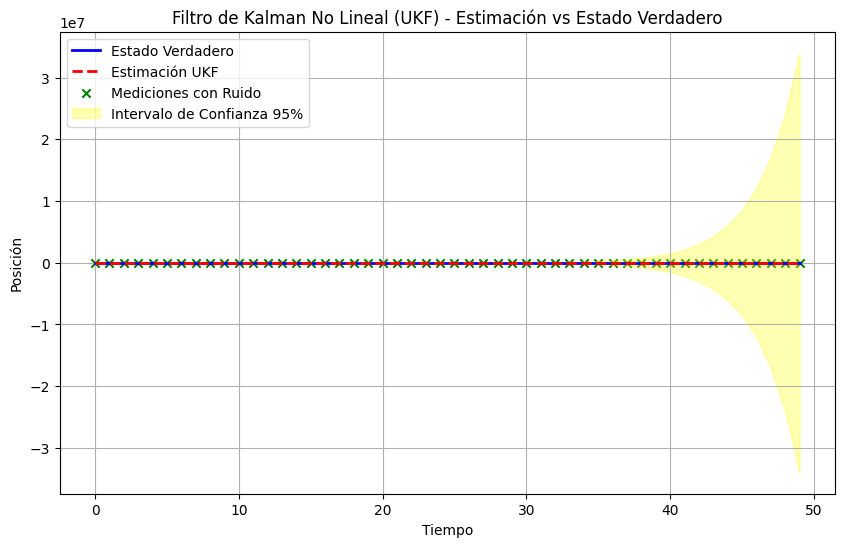

In [18]:
# Parámetros de ejemplo
# Inicialización
time_steps = 50
true_state = np.linspace(0, 10, time_steps)  # Verdadero estado, por ejemplo una línea recta

# Simulamos algunas mediciones (rango)
measurements = true_state + np.random.normal(0, 1, time_steps)  # Medición con ruido

# Resultados del filtro UKF
mu_est = np.zeros(time_steps)
mu_est[0] = mu_updated[0]  # Estado inicial estimado por UKF
Sigma_est = np.zeros(time_steps)

# Realiza las iteraciones del UKF para obtener las estimaciones del estado
for t in range(1, time_steps):
    # Convertir la medición en un vector
    z = np.array([measurements[t]])  # Convertir la medición en un vector

    # Actualizar el estado usando el UKF
    mu_updated, Sigma_updated = unscented_kalman_filter(mu_updated, Sigma_updated, u, z, func_g, h, R, Q)

    # Guardamos el estado estimado y su covarianza
    mu_est[t] = mu_updated[0]
    Sigma_est[t] = Sigma_updated[0, 0]

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Estado verdadero
plt.plot(true_state, label='Estado Verdadero', color='blue', linestyle='-', linewidth=2)

# Estimaciones del UKF
plt.plot(mu_est, label='Estimación UKF', color='red', linestyle='--', linewidth=2)

# Mediciones con ruido
plt.scatter(range(time_steps), measurements, color='green', marker='x', label='Mediciones con Ruido')

# Intervalos de confianza (2 sigmas)
plt.fill_between(range(time_steps), mu_est - 2 * np.sqrt(Sigma_est), mu_est + 2 * np.sqrt(Sigma_est),
                 color='yellow', alpha=0.3, label='Intervalo de Confianza 95%')

plt.title("Filtro de Kalman No Lineal (UKF) - Estimación vs Estado Verdadero")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
